In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [52]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [53]:
df=pd.read_csv('height-weight.csv')


In [54]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

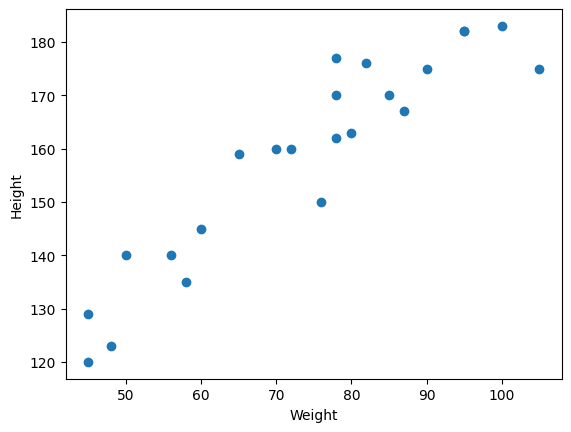

In [55]:
## Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [56]:
## Corelation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


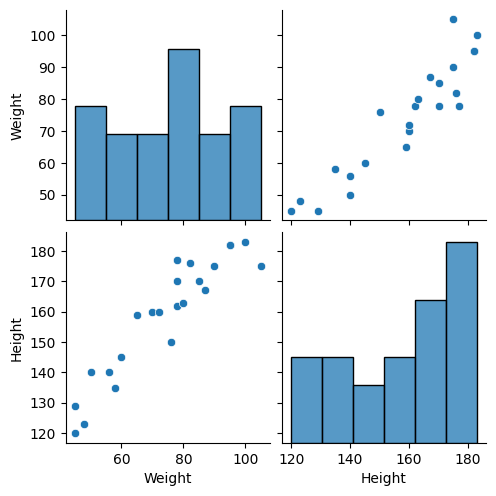

In [57]:
## Seaborn for visualization
!pip install seaborn
import seaborn as sns
sns.pairplot(df)

In [58]:
## Independent and dependent features
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Height'] ## this variiable can be in series or 1d array

In [59]:
X_series=df['Weight'] ## independent
np.array(X_series).shape

(23,)

In [60]:
X_series=df['Weight']
np.array(X_series).shape


(23,)

In [61]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [63]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)




array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [64]:
X_test=scaler.transform(X_test)

In [65]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [66]:
## Apply simple linear regression

from sklearn.linear_model import LinearRegression


In [67]:
regression=LinearRegression(n_jobs=-1)

In [68]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [69]:
print("Coefficient or slope",regression.coef_)
print("Intercept",regression.intercept_)

Coefficient or slope [1.04792503]
Intercept 80.52684512622542


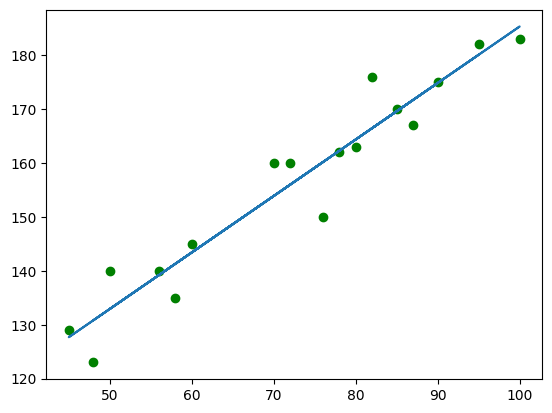

In [70]:
## plot Ttraining data plot best fit line
plt.scatter(X_train,y_train,color="green")
plt.plot(X_train,regression.predict(X_train))

In [71]:
## Prediction for test data
y_pred=regression.predict(X_test)

c:\Users\KIIT\Desktop\Python\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
## Performance matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7276.932884039703
82.97662409755102
85.3049405605543


## R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [74]:
from sklearn.metrics import r2_score

In [75]:
score=r2_score(y_test,y_pred)
print(score)

-15.723241865651406


## Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [76]:

#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-19.904052332064257

In [78]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.8 MB 880.9 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.8 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.8 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.8 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.8 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 4.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.8 MB 4.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.8 MB 5.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 5.2 MB/s eta 0:00:02
   ----------- -------

In [79]:

## OLS Linear Regression
import statsmodels.api as sm

In [80]:
model=sm.OLS(y_train,X_train).fit()

In [81]:
prediction=model.predict(X_test)
print(prediction)

[ 0.70487577  0.70487577 -3.5018828   2.87199382 -0.95233215  4.14676914]


In [82]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):                    2.80e-16
Time:                        08:08:52   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\KIIT\Desktop\Python\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [83]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

c:\Users\KIIT\Desktop\Python\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\KIIT\Desktop\Python\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.49697064])